In [46]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
from sklearn.datasets import load_iris
from termcolor import colored

##### **Machine Learning Problems**

In [48]:
iris = load_iris()
print(colored('Dataset Type :', 'blue'),type(iris))
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

Dataset Type : <class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [49]:
df = pd.read_csv(r'C:\Users\CihangirA\Desktop\CihangirA_Codes\weight-height.csv')

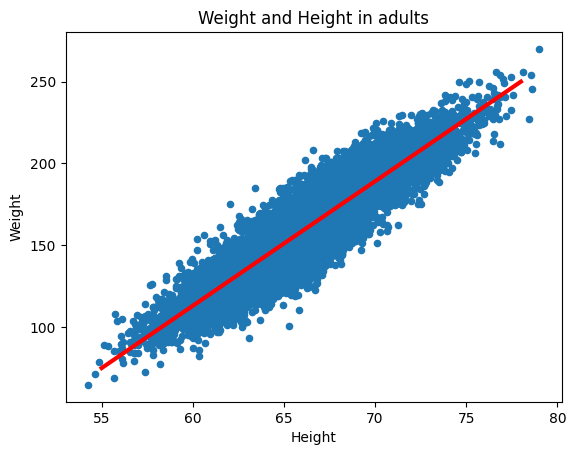

In [50]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot([55,78], [75, 250], color='red', linewidth=3); # were plotting the red line BY HAND with fixed values

In [51]:
def line(x, w=0, b=0):
    return x*w+b

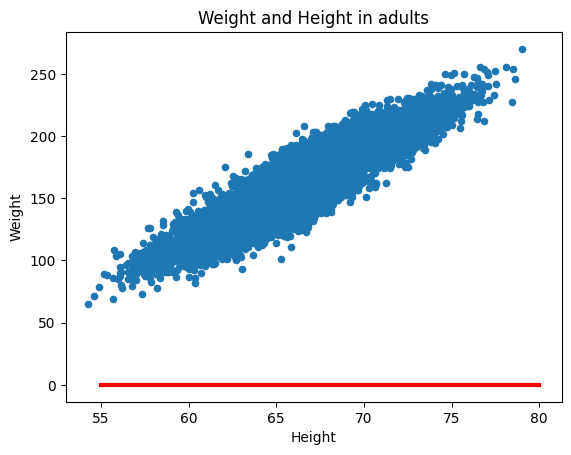

In [52]:
x = np.linspace(55,80,100)
y_hat = line(x, w=0, b=0)

df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot(x, y_hat, color='red', linewidth=3);

In [53]:
def MSE(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [54]:
X = df[['Height']].values
y_true = df['Weight'].values
y_pred = line(X)

In [55]:
print(colored('Mean Squared Error :', 'red'), MSE(y_true, y_pred.ravel())) # same result but faster

Mean Squared Error : 27093.83757456157


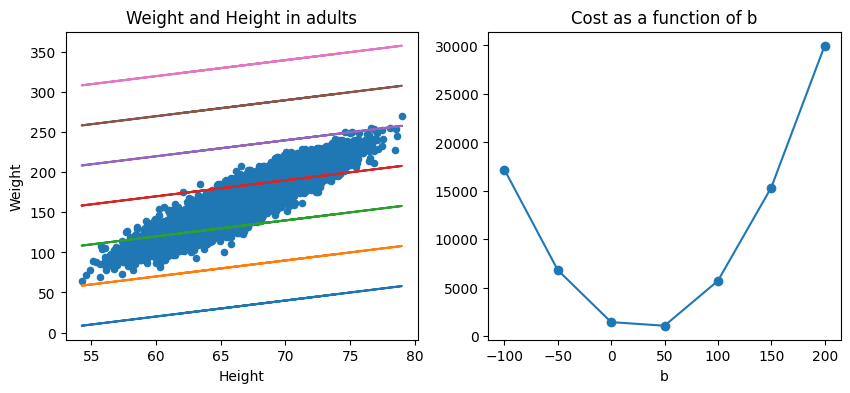

In [56]:
plt.figure(figsize=(10,4))
axl = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults', ax=axl);
bbs = np.array([-100, -50, 0, 50, 100,150,200])
mses = []
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = MSE(y_true, y_pred.ravel())
    mses.append(mse)
    plt.plot(X, y_pred);
ax2 = plt.subplot(122);
plt.plot(bbs, mses, 'o-');
plt.title('Cost as a function of b');
plt.xlabel('b');

##### **Linear Regression with KERAS**

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [58]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40


c:\Users\CihangirA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


313/313 [==============================] - 1s 1ms/step - loss: 630.0031
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 542.9207
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 469.6198
Epoch 4/40
313/313 [==============================] - 0s 801us/step - loss: 417.5092
Epoch 5/40
313/313 [==============================] - 0s 952us/step - loss: 381.0617
Epoch 6/40
313/313 [==============================] - 0s 898us/step - loss: 340.0439
Epoch 7/40
313/313 [==============================] - 0s 828us/step - loss: 302.0634
Epoch 8/40
313/313 [==============================] - 0s 844us/step - loss: 274.9914
Epoch 9/40
313/313 [==============================] - 0s 863us/step - loss: 263.3948
Epoch 10/40
313/313 [==============================] - 0s 927us/step - loss: 242.9346
Epoch 11/40
313/313 [==============================] - 0s 871us/step - loss: 231.1783
Epoch 12/40
313/313 [==============================] - 0s 911us/step - loss: 208

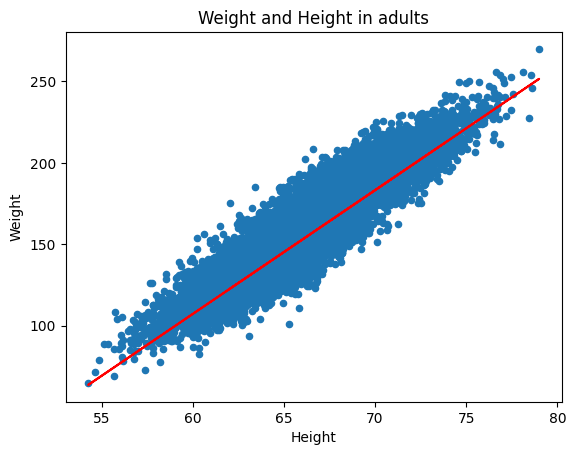

In [59]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X, y_true, epochs=40)
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot(X, y_pred, color='red');

In [60]:
W,  B = model.get_weights()
print(colored('W :', 'blue'), W)
print(colored('B :', 'blue'), B)

W : [[7.604357]]
B : [-349.13406]


##### **Train Test Split**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_true, test_size=0.2)
print(colored('X Train:', 'blue'), len(X_train))
print(colored('X Test:', 'blue'), len(X_test))
W[0,0] = 0.0
B[0] = 0.0
model.set_weights((W,B))

X Train: 8000
X Test: 2000


In [63]:
model.fit(X_train, Y_train, epochs=50, verbose=0)
Y_train_pred = model.predict(X_train).ravel()
Y_test_pred = model.predict(X_test).ravel()

63/63 [==============================] - 0s 715us/step


In [64]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [65]:
print(colored('MSE on the Train set:', 'blue'), mse(Y_train, Y_train_pred))
print(colored('MSE on the Test set:', 'blue'), mse(Y_test, Y_test_pred))
print(colored('R2 Score on the Train set:', 'blue'), r2_score(Y_train, Y_train_pred))
print(colored('R2 Score on the Train set:', 'blue'), r2_score(Y_train, Y_train_pred))

MSE on the Train set: 180.92121327691373
MSE on the Test set: 174.03817228475822
R2 Score on the Train set: 0.8254387025087692
R2 Score on the Train set: 0.8254387025087692


##### **Feature Preprocessing**

In [66]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [67]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


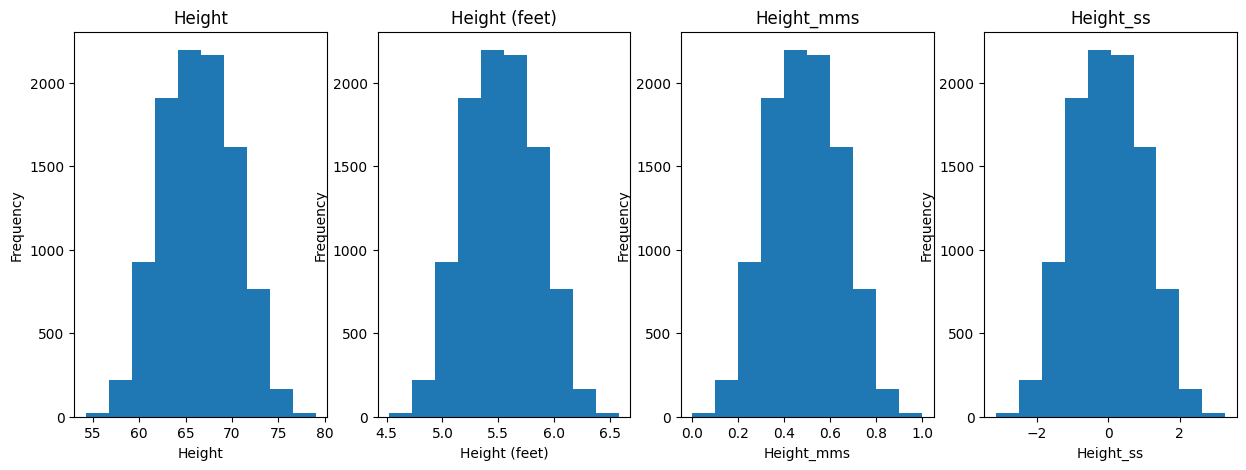

In [72]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1,4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

##### **Exercise 1**

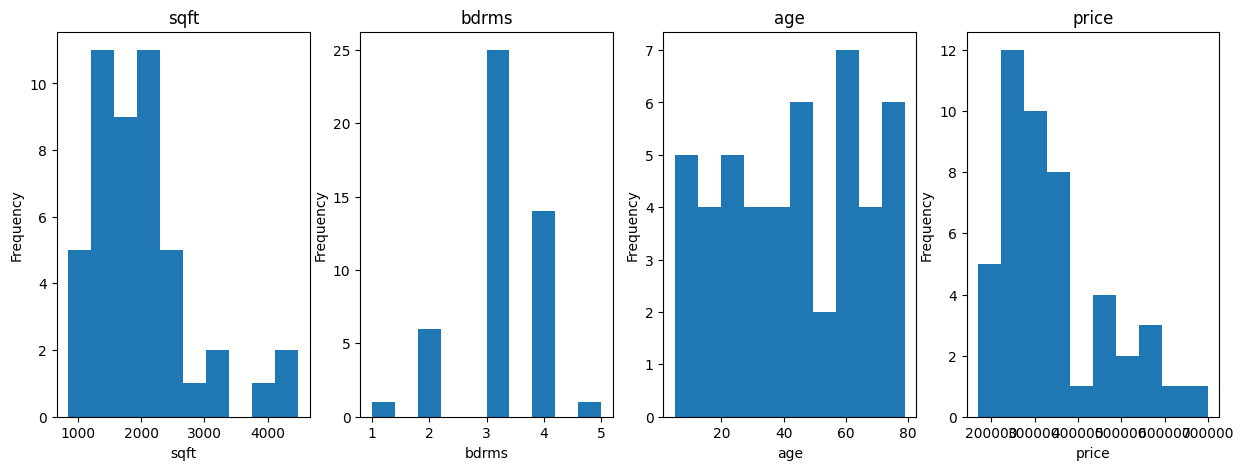

In [96]:
df1 = pd.read_csv(r'C:\Users\CihangirA\Desktop\CihangirA_Codes\housing-data.csv')
plt.figure(figsize=(15,5))
for i, feature in enumerate(df1.columns):
    plt.subplot(1, 4, i+1)
    df1[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [97]:
X = df1[['sqft', 'bdrms', 'age']].values
Y = df1['price'].values

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [99]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(colored('Length of X :', 'blue'), len(X))
print(colored('Length of X Train:', 'blue'), len(X_train))
model.fit(X_train, Y_train, epochs=10);

Length of X : 47
Length of X Train: 37
Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 124246319104.0000
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 121946767360.0000
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 119511957504.0000
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 117327880192.0000
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 115105325056.0000
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 112888561664.0000
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 110605336576.0000
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 108569231360.0000
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 106421493760.0000
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 104260780032.0000


In [100]:
df1['sqft1000'] = df1['sqft']/1000.0
df1['age10'] = df1['age']/10.0
df1['price100k'] = df1['price']/1e5
X = df1[['sqft1000', 'bdrms', 'age10']].values
Y = df1['price100k'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')
model.fit(X_train, Y_train, epochs=20);

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 15.7666
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 10.8888
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 7.7465
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 3.0433
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 5.4540
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 3.5642
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 1.8790
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 4.6569
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7031
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 3.3224
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6625
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 3.4093
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 

In [105]:
Y_tra_pred = model.predict(X_train)
Y_te_pred = model.predict(X_test)
print(colored('R2 Score on the Train set:', 'blue'), r2_score(Y_train, Y_tra_pred ))
print(colored('R2 Score on the Test set:', 'blue'), r2_score(Y_test, Y_te_pred ))
model.fit(X_train, Y_train, epochs=20, verbose=0);
Y_tra_pred = model.predict(X_train)
Y_te_pred = model.predict(X_test)
print(colored('R2 Score on the Train set:', 'blue'), r2_score(Y_train, Y_tra_pred ))
print(colored('R2 Score on the Test set:', 'blue'), r2_score(Y_test, Y_te_pred ))

1/1 [==============================] - 0s 25ms/step
R2 Score on the Train set: 0.6376610375461746
R2 Score on the Test set: 0.48134472075693113
1/1 [==============================] - 0s 23ms/step
R2 Score on the Train set: 0.7203082156602438
R2 Score on the Test set: 0.49086073713799383


##### **Exercise 2**

In [111]:
df2 = pd.read_csv(r'C:\Users\CihangirA\Desktop\CihangirA_Codes\HR_comma_sep.csv')
df2.left.value_counts() / len(df2)

left
0    0.761917
1    0.238083
Name: count, dtype: float64

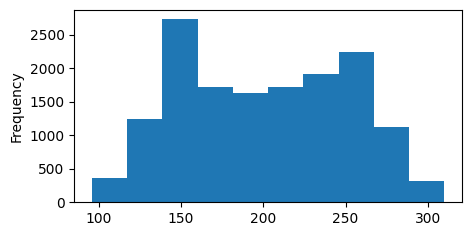

In [120]:
plt.figure(figsize=(5, 2.5))
df2['average_montly_hours'].plot(kind='hist');

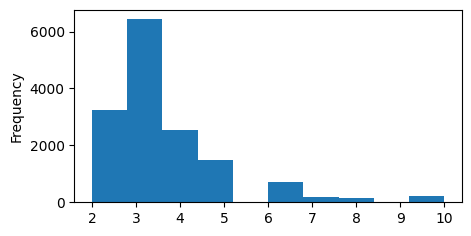

In [124]:
df2['average_m_h_100'] = df2['average_montly_hours']/100.0
plt.figure(figsize=(5, 2.5))
df2['time_spend_company'].plot(kind='hist');

In [140]:
df_dummies = pd.get_dummies(df2[['sales','salary']])
X = pd.concat([df2[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years', 'sales', 'salary', 'average_m_h_100']], 
               df_dummies], axis=1).values
Y = df2['left'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [145]:
X

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [147]:
## E2 doesn't work.  